In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
import os
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('pjme.csv',index_col=[0], parse_dates=[0])
df.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
df.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


In [4]:
df_m = df.resample('M').mean()
df_w = df.resample('W').mean()

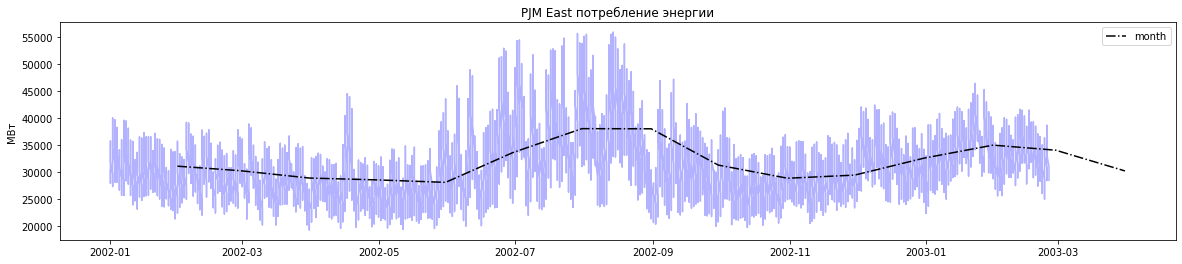

In [5]:
plt.figure(figsize =(20,4))
plt.plot( df.index[:5*24*7*4*3], df['PJME_MW'].values[:5*24*7*4*3], 'b',alpha =0.3 )
plt.plot( df_m.index[:5*3], df_m['PJME_MW'].values[:5*3], '-.k',label='month'  )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.legend()
plt.show()

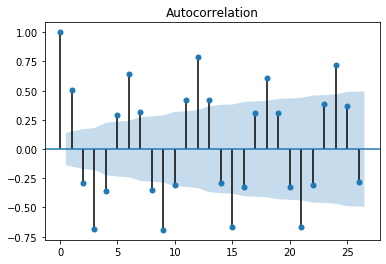

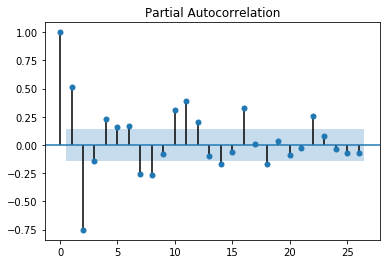

In [6]:
sm.graphics.tsa.plot_acf(df_m['PJME_MW'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(df_m['PJME_MW'].values, lags=26)
plt.show()

In [7]:
import warnings

q = 2
p = 1
d = 2
pdq = [p, d, q]


qs = 1
ps = 0
ds = 1
seasonal_pdq = [ps, ds, qs ,26]

In [8]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 26)
SARIMAX: (0, 0, 1) x (0, 0, 2, 26)
SARIMAX: (0, 0, 2) x (0, 1, 0, 26)
SARIMAX: (0, 0, 2) x (0, 1, 1, 26)


In [9]:
warnings.filterwarnings("ignore") 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 26)3 - AIC:3992.5110075928433
ARIMA(0, 0, 0)x(0, 0, 1, 26)3 - AIC:3285.6570594543186
ARIMA(0, 0, 0)x(0, 0, 2, 26)3 - AIC:5355.3924835965145
ARIMA(0, 0, 0)x(0, 1, 0, 26)3 - AIC:2879.425251103865
ARIMA(0, 0, 0)x(0, 1, 1, 26)3 - AIC:2339.951891125027
ARIMA(0, 0, 0)x(0, 2, 0, 26)3 - AIC:2484.2063266048976
ARIMA(0, 0, 0)x(0, 2, 1, 26)3 - AIC:1888.4709056133663
ARIMA(0, 0, 0)x(1, 0, 0, 26)3 - AIC:2899.3272027999014
ARIMA(0, 0, 0)x(1, 0, 1, 26)3 - AIC:2880.0135062256086
ARIMA(0, 0, 0)x(1, 0, 2, 26)3 - AIC:2330.758888452877
ARIMA(0, 0, 0)x(1, 1, 0, 26)3 - AIC:2351.140285803429
ARIMA(0, 0, 0)x(1, 1, 1, 26)3 - AIC:2332.2154398894536
ARIMA(0, 0, 0)x(1, 2, 0, 26)3 - AIC:1927.0384944589027
ARIMA(0, 0, 0)x(1, 2, 1, 26)3 - AIC:1899.1945235986561
ARIMA(0, 0, 0)x(2, 0, 0, 26)3 - AIC:2352.194131000001
ARIMA(0, 0, 0)x(2, 0, 1, 26)3 - AIC:2353.027023770202
ARIMA(0, 0, 0)x(2, 0, 2, 26)3 - AIC:2332.9625150018073
ARIMA(0, 0, 0)x(2, 1, 0, 26)3 - AIC:1735.9925256721667
ARIMA(0, 0, 0)x(

In [11]:
warnings.filterwarnings("ignore") 

mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30],order=[0,1,0],
                                seasonal_order=[2,2,1,26] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 1250.2370586507689


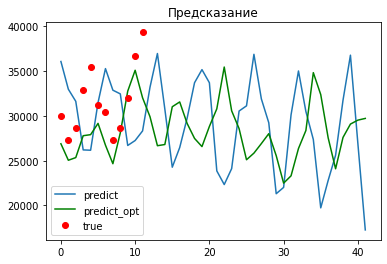

In [13]:
pred_dynamic = results.forecast(42)   
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
plt.plot(df_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание')
plt.legend()

plt.show()